In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 35 columns):
Item_Identifier              8523 non-null object
Item_MRP                     8523 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Visibility              8523 non-null float64
Item_Weight                  8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_years                 8523 non-null int64
Item_Visibility_MeanRatio    8523 non-null float64
Item_Fat_Content_0           8523 non-null int64
Item_Fat_Content_1           8523 non-null int64
Item_Fat_Content_2           8523 non-null int64
Item_Fat_Content_3           8523 non-null int64
Outlet_Location_Type_0       8523 non-null int64
Outlet_Location_Type_1       8523 non-null int64
Outlet_Location_Type_2       8523 non-null int64
Outlet_Size_0                8523 non-null int64
Outlet_Size_1                8523 non-null int64
Outlet_Size_2                8523 non-null int64

In [5]:
#most of the items has non - zero values or non null
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
Uniqueid =len(set(train.Item_Identifier))  # set removes dupplicate values

In [8]:
Totalid =train.shape[0]
Duplicate = Totalid - Uniqueid
print("no . of duplicate id is ",Duplicate)

no . of duplicate id is  6964


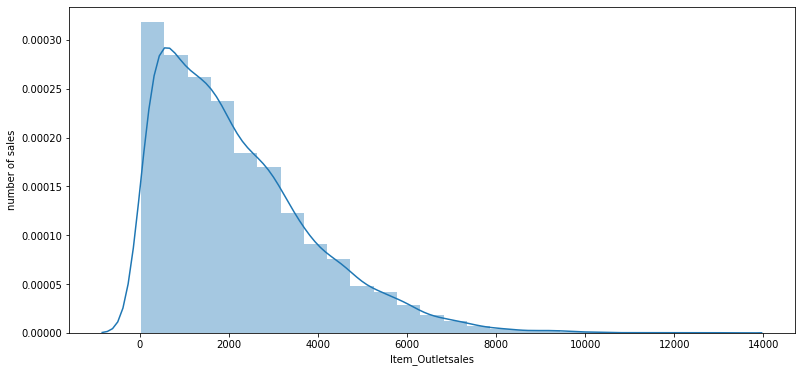

In [9]:
#histogram of Item_outlet_sales vs Number of sales
plt.figure(figsize= (13,6))
sns.distplot(train.Item_Outlet_Sales,bins = 25)
plt.ticklabel_format(style = 'plain',axis = 'x',scilimits=(0,1))
plt.xlabel('Item_Outletsales')
plt.ylabel('number of sales')
plt.show()

In [10]:
# so more the item outlests the sale is decreasing
#skewness - > distortion in data
print('the skewness is',train.Item_Outlet_Sales.skew())

the skewness is 1.1775306028542798


so our target variable is skewwed to the right


after this lets see which of pur features are numeric


In [11]:
nm_features =train.select_dtypes(include=[np.number])
nm_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [12]:
#relation between numerical predictors and target variable
correlation = nm_features.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [13]:
correlation['Item_Outlet_Sales'].sort_values

<bound method Series.sort_values of Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64>

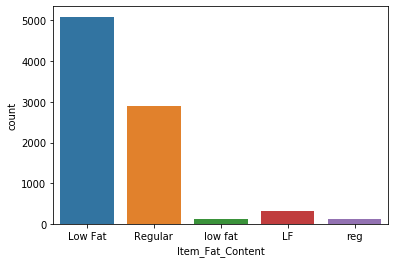

In [14]:
sns.countplot(train.Item_Fat_Content)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

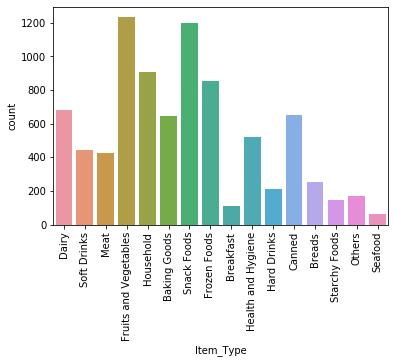

In [15]:
#for Item_Type
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

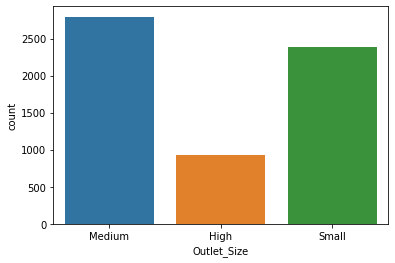

In [16]:
#for Outlet_Size
sns.countplot(train.Outlet_Size)

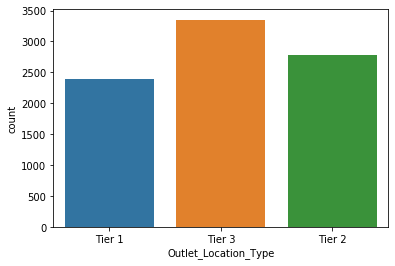

In [17]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

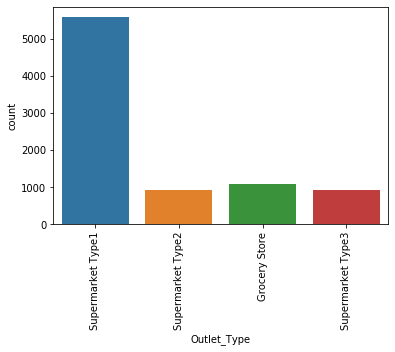

In [18]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

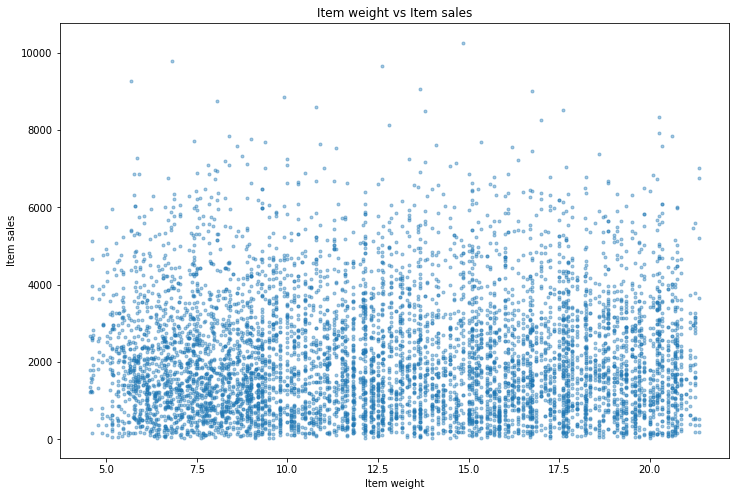

In [19]:
#Item_Weight vs Item_Sales
plt.figure(figsize=(12,8))
plt.xlabel("Item weight")
plt.ylabel('Item sales')
plt.title('Item weight vs Item sales')
plt.plot(train.Item_Weight,train.Item_Outlet_Sales,'.',alpha = 0.4)#alpha = size of dots

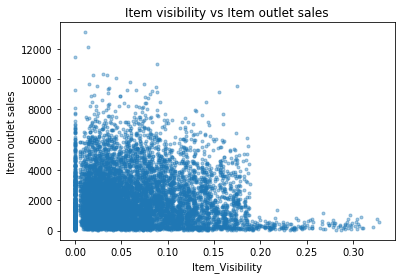

In [20]:
plt.xlabel('Item_Visibility')
plt.ylabel('Item outlet sales')
plt.title('Item visibility vs Item outlet sales')
plt.plot(train.Item_Visibility,train.Item_Outlet_Sales,'.',alpha= 0.4)

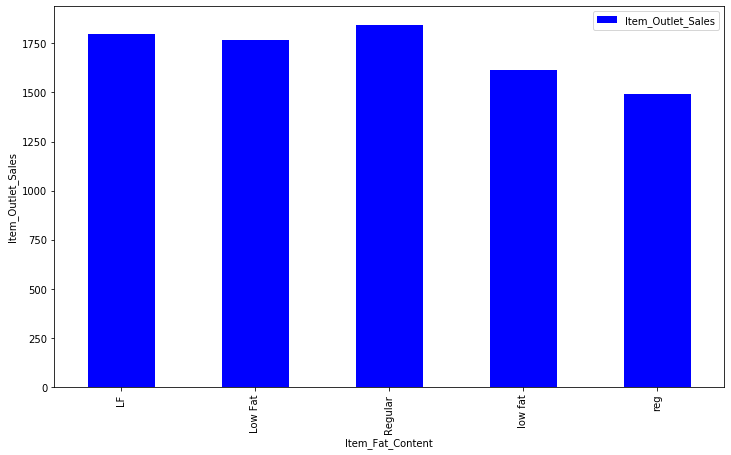

In [21]:
#Item_Fat_Content vs Item_Outlet_Sales
#Create a spreadsheet-style pivot table as a DataFrame. pivot_table

Item_Fat_Content_pivot=train.pivot_table(index ='Item_Fat_Content',values ='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind = 'bar',color = 'blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.show()

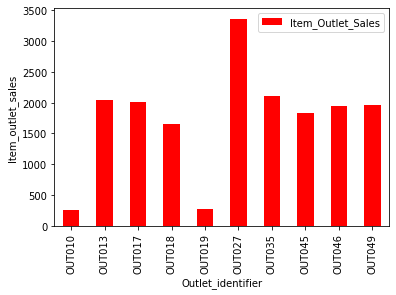

In [22]:
#impact of Outlet_identifier on Item_outlet_sales
Outlet_Identifier_pivot = train.pivot_table(index ='Outlet_Identifier',values = 'Item_Outlet_Sales',aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind ='bar',color = 'red')
plt.xlabel('Outlet_identifier')
plt.ylabel('Item_outlet_sales')
plt.show()

we can see thet outlet 27  had the highest sales  except 2 all others had median sales


In [23]:
train.pivot_table(values='Outlet_Type',columns = 'Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [24]:
train.pivot_table(values='Outlet_Type',columns = 'Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


impact of outlet size on item outlet sales


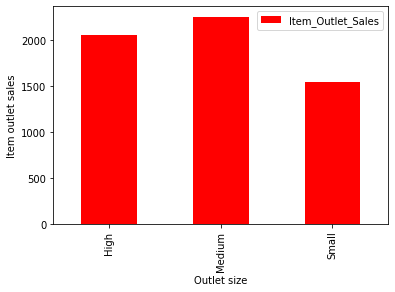

In [25]:
Outlet_size_pivot = train.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_size_pivot.plot(kind = 'bar',color = 'red', )
plt.xlabel('Outlet size')
plt.ylabel('Item outlet sales')
plt.show()

so medium size supermarkets had the highest sales compared to high ones and the small ones


In [26]:
#outlet_type vs item outlet sales


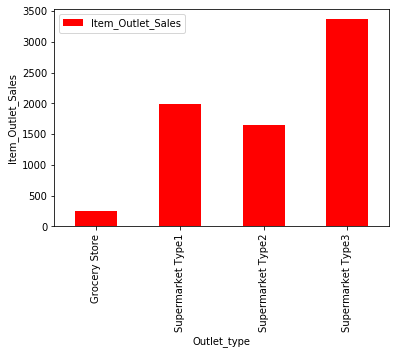

In [27]:
Outlet_type_pivot= train.pivot_table(index ='Outlet_Type',values='Item_Outlet_Sales',aggfunc = np.median)
Outlet_type_pivot.plot(kind = 'bar', color = 'red')
plt.xlabel('Outlet_type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

it shows that supermarket type 3 has highest outlety types

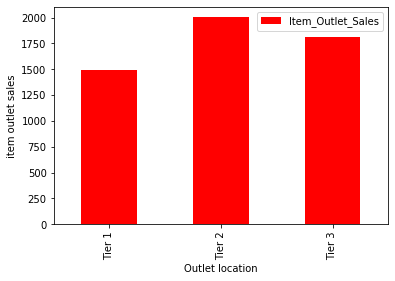

In [28]:
#outlet location type vs item outlet saled
outlet_location_type_pivot = train.pivot_table(index='Outlet_Location_Type',values = 'Item_Outlet_Sales',aggfunc=np.median)
outlet_location_type_pivot.plot(kind= 'bar',color = 'red')
plt.xlabel('Outlet location')
plt.ylabel('item outlet sales')
plt.show()

supermarket of type 2 location had the highest outlet sales

for cleaning the data we have to merge the data clean it then again we can split the data 
instead of doing everything twice

In [29]:
#joining the data
train['source']= 'train'
test['source'] ='test'
data = pd.concat([train,test],ignore_index=True,sort=True)


In [30]:
data.shape

(14204, 13)

In [31]:
data.info

<bound method DataFrame.info of       Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0              Low Fat           FDA15  249.8092          3735.1380   
1              Regular           DRC01   48.2692           443.4228   
2              Low Fat           FDN15  141.6180          2097.2700   
3              Regular           FDX07  182.0950           732.3800   
4              Low Fat           NCD19   53.8614           994.7052   
...                ...             ...       ...                ...   
14199          Regular           FDB58  141.3154                NaN   
14200          Regular           FDD47  169.1448                NaN   
14201          Low Fat           NCO17  118.7440                NaN   
14202          Regular           FDJ26  214.6218                NaN   
14203          Regular           FDU37   79.7960                NaN   

                   Item_Type  Item_Visibility  Item_Weight  \
0                      Dairy         0.016047        

In [61]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 36 columns):
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Identifier            14204 non-null object
source                       14204 non-null object
Outlet_years                 14204 non-null int64
Item_Visibility_MeanRatio    14204 non-null float64
Item_Fat_Content_0           14204 non-null uint8
Item_Fat_Content_1           14204 non-null uint8
Item_Fat_Content_2           14204 non-null uint8
Item_Fat_Content_3           14204 non-null uint8
Outlet_Location_Type_0       14204 non-null uint8
Outlet_Location_Type_1       14204 non-null uint8
Outlet_Location_Type_2       14204 non-null uint8
Outlet_Size_0                14204 non-null uint8
Outlet_Size_1                

In [62]:
#checking the percentage of non null values
data.isnull().sum()

Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Visibility                 0
Item_Weight                     0
Outlet_Identifier               0
source                          0
Outlet_years                    0
Item_Visibility_MeanRatio       0
Item_Fat_Content_0              0
Item_Fat_Content_1              0
Item_Fat_Content_2              0
Item_Fat_Content_3              0
Outlet_Location_Type_0          0
Outlet_Location_Type_1          0
Outlet_Location_Type_2          0
Outlet_Size_0                   0
Outlet_Size_1                   0
Outlet_Size_2                   0
ItemType_Combined_0             0
ItemType_Combined_1             0
ItemType_Combined_2             0
Outlet_Type_0                   0
Outlet_Type_1                   0
Outlet_Type_2                   0
Outlet_Type_3                   0
outlet_0                        0
outlet_1                        0
outlet_2                        0
outlet_3      

In [34]:
#calculating mean value for replacing null values in null value
avg_mean=data.pivot_table(values = 'Item_Weight',index ='Item_Identifier')
print(avg_mean)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1559 rows x 1 columns]


In [35]:
def replace_null(cols):
    weight = cols[0]
    identifier =cols[1]
    if pd.isnull(weight):
        return  avg_mean['Item_Weight'][avg_mean.index==identifier]
    else:
        return weight
print("original number of null values",sum(data['Item_Weight'].isnull()))

data['Item_Weight'] =data[['Item_Weight','Item_Identifier']].apply(replace_null,axis=1).astype(float)
print('final number of null values',sum(data['Item_Identifier'].isnull()))

original number of null values 2439
final number of null values 0


replacing null values of Outlet_size with mode  #mode used when there is more frequent values

In [36]:
from scipy.stats import mode  # scipy = more mathematical functions than numpy
outlet_size_mode  = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc =lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
#to calculate the average value
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [38]:
#replacing null values in outlet_size
def replace_outlet(cols):
    size=cols[0]
    Type = cols[1]
    if pd.isnull(size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns==Type][0]
    else:
        return size
print("original number of null values",sum(data['Outlet_Size'].isnull()))
data['Outlet_Size']=data[['Outlet_Size','Outlet_Type']].apply(replace_outlet,axis =1)
print('final data with null vakues',sum(data['Outlet_Size'].isnull()))

original number of null values 4016
final data with null vakues 0


previously we saw that item_visibility has minimum value of 0 which implies that is hidden which doesn't make sense replacing those values with mean values


In [39]:
def replace_visibility(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility ==0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index==item]
    else:
        return visibility
print('original numbers with 0 as values',sum(data['Item_Visibility']==0))
data['Item_Visibility']=data[['Item_Visibility','Item_Identifier']].apply(replace_visibility,axis=1).astype(float)
print('final number with 0 as its value',sum(data['Item_Visibility']==0))

original numbers with 0 as values 879
final number with 0 as its value 0


the data is very old from 2013 

In [40]:
data['Outlet_years']=2013-data['Outlet_Establishment_Year']
data['Outlet_years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_years, dtype: float64

item_type has 14 categories which is a lot to process individually 
so combining it

In [41]:
data['ItemType_Combined']= data['Item_Identifier'].apply(lambda x:x[0:2])
data['ItemType_Combined']= data['ItemType_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['ItemType_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: ItemType_Combined, dtype: int64

In [42]:
#there was some typos in item_fat_content fixing it
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low fat','reg':'Regular','low fat':'Low fat'})

but again there are some non consumable product also so creating a new column 

In [43]:
data.loc[data['ItemType_Combined']=="Non-Consumable",'Item_Fat_Content']='Non-Edible'


creating a variable for visibility

In [44]:
func = lambda x:x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index==x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio']= data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

we all know that scikit only works with numerical values so converting using
LabelEncoder()

In [46]:
from sklearn.preprocessing  import LabelEncoder
Le = LabelEncoder()
#for outlet
data['outlet'] =Le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','ItemType_Combined','Outlet_Type','outlet']
for i in var_mod:
    data[i]=Le.fit_transform(data[i])


we have done something called as One-Hot-Coding -> creating a dummy variables one for each type of type variable

In [47]:
data = pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','ItemType_Combined','Outlet_Type','outlet'])
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
ItemType_Combined_0            uint8
ItemType_Combined_1            uint8
ItemType_Combined_2            uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
O

In [48]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis =1,inplace = True)
#dividing into trains and test
train= data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
train.drop(['source'],axis =1,inplace=True)
test.drop(['source'],axis =1,inplace = True)

E:\codes\conda\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
